In [2]:
import numpy as np
from scipy.spatial import distance
import pandas as pd
import math
import os
import numpy as np
import nibabel as nibs
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from nilearn import image, datasets, plotting, masking
import pandas as pd
from scipy.spatial import distance

import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

import csv

from rdm_plot_function import plot_rdm
from rdm_calc_function import activity_vector_rdm

def upper(df):
    try:
        assert(type(df)==np.ndarray)
    except:
        if type(df)==pd.DataFrame:
            df = df.values
        else:
            raise TypeError('Must be np.ndarray or pd.DataFrame')
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

In [3]:
import pandas as pd
import numpy as np

for y in range (0,3):
    nodes_Memnet = ['x', 'conv1', 'relu1', 'pool1', 'norm1', 'conv2', 'relu2', 'pool2', 'norm2', 'conv3', 'relu3', 'conv4', 'relu4', 'conv5', 'relu5', 'pool5', 'view', 'fc6', 'relu6', 'drop6', 'fc7', 'relu7', 'drop7']

    for x in range(0, len(nodes_Memnet)):
        file_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet/'+nodes_Memnet[x]+'.csv'

        with open(file_path, 'r') as f:
            columns = f.readline().strip().split(',')

        chosen_columns = np.random.choice(columns, size=20, replace=False)

        Memnet_layers = pd.read_csv(file_path, usecols=chosen_columns)

        activity_vectors_path = []

        for column in Memnet_layers.columns:
            activity_vector = Memnet_layers[column].values.flatten().tolist()
            activity_vectors_path.append(activity_vector)

        rdm_data_path = activity_vector_rdm(activity_vectors_path) 

        df = pd.DataFrame(rdm_data_path)
        df.to_csv('/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet_rdm_random/'+nodes_Memnet[x]+'_'+str(y)+'_rdm.csv', index=False)
        print(x)
    
    nodes_Alexnet = ['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5']

    for x in range (0,len(nodes_Alexnet)):
        file_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet/'+nodes_Alexnet[x]+'.csv'
        
        with open(file_path, 'r') as f:
            columns = f.readline().strip().split(',')

        chosen_columns = np.random.choice(columns, size=20, replace=False)


        Alexnet_layers = pd.read_csv(file_path, usecols=chosen_columns)

        activity_vectors_path = []

        for column in Alexnet_layers.columns:
            activity_vector = Alexnet_layers[column].values.flatten().tolist()
            activity_vectors_path.append(activity_vector)
        
        rdm_data_path = activity_vector_rdm(activity_vectors_path)

        df = pd.DataFrame(rdm_data_path)
        df.to_csv('/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet_rdm_random/'+nodes_Alexnet[x]+'_'+str(y)+'_rdm.csv', index=False)
        print (x)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [23]:
nodes_Memnet = ['x', 'conv1', 'relu1', 'pool1', 'norm1', 'conv2', 'relu2', 'pool2', 'norm2', 'conv3', 'relu3', 'conv4', 'relu4', 'conv5', 'relu5', 'pool5', 'view', 'fc6', 'relu6', 'drop6', 'fc7', 'relu7', 'drop7']

nodes_Alexnet = ['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5']

r_value = []
layer_number = []

for y in range (0,3):
    
    r_value_loop = []

    for x in range(min(len(nodes_Memnet), len(nodes_Alexnet))):

        memnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet_rdm_random/'+nodes_Memnet[x]+'_'+str(y)+'_rdm.csv'
        alexnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet_rdm_random/'+nodes_Alexnet[x]+'_'+str(y)+'_rdm.csv'
        
        rdm_memnet = pd.read_csv(memnet_path)
        rdm_alexnet = pd.read_csv(alexnet_path)

        spearman_r, _ = (spearmanr(upper(rdm_memnet), upper(rdm_alexnet)))
        r_value_loop.append(spearman_r)

    r_value.append(r_value_loop)

averages = [0] * len(r_value[0]) 
standard_errors = [0] * len(r_value[0])

for i in range(len(r_value[0])):
    values_at_index = [sublist[i] for sublist in r_value]
    avg = sum(values_at_index) / len(r_value)
    averages[i] = avg

    variance = sum((x - avg) ** 2 for x in values_at_index) / (len(r_value) - 1)
    std_dev = math.sqrt(variance)
    
    sem = std_dev / math.sqrt(len(r_value))
    standard_errors[i] = sem

for x in range((min(len(nodes_Memnet), len(nodes_Alexnet)))):
    layer_number.append(x)

[-0.04116836594103059, -0.03759106900468158, -0.033670855439937836, -0.06919480201376041, -0.09710459977751244, 0.12496540945149377, 0.011451840771212493, 0.004324073709579358, 0.12409062213416032, -0.001198750220519309, 0.11408130564923069, -0.01774867905905634, 0.1409985114035817, 0.036765269777118775, 0.17390334474930783, -0.025349878477461837, 0.05596451862640895, 0.15860972967613918, 0.15545932895064887, 0.058775501872773854, -0.024195742410126536, 0.09477241678950139]


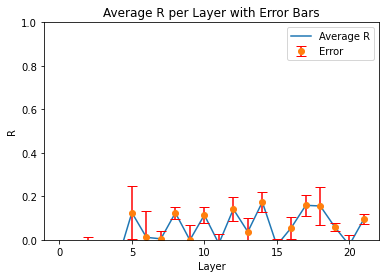

In [26]:
print (averages)

plt.plot(layer_number, averages, label='Average R')

plt.errorbar(layer_number, averages, yerr=standard_errors, fmt='o', capsize=5, ecolor='red', linestyle='None', label='Error')

plt.xlabel('Layer')
plt.ylabel('R')
plt.ylim(0, 1)
plt.title('Average R per Layer with Error Bars')
plt.legend()

plt.show()